In [3]:
# İlk kod hücrem!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🎉 Jupyter Notebook çalışıyor!")
print(f"Pandas version: {pd.__version__}")

# Hızlı test
data = {'Film': ['A', 'B', 'C'], 'Puan': [4.5, 3.8, 4.2]}
df = pd.DataFrame(data)
df

🎉 Jupyter Notebook çalışıyor!
Pandas version: 2.2.3


,Film,Puan
0,A,4.5
1,B,3.8
2,C,4.2


In [4]:
# %% [markdown]
# # 📊 RATINGS.CSV DOSYA KONTROLÜ
# **Amaç: ratings.csv dosyasını incelemek ve kontrol etmek**

# %%
# Kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("✅ Kütüphaneler hazır!")

✅ Kütüphaneler hazır!


In [5]:
# %% [markdown]
# ## 1. 📁 DOSYA VARLIK KONTROLÜ

# %%
# Data klasöründeki dosyaları listele
data_files = os.listdir('data')
print("📂 Data klasöründeki dosyalar:")
for file in data_files:
    file_path = os.path.join('data', file)
    size_mb = os.path.getsize(file_path) / (1024*1024)
    print(f"   📄 {file} - {size_mb:.1f} MB")

# Rating.csv kontrolü
if 'rating.csv' in data_files:
    print(f"\n🎉 rating.csv BULUNDU!")
    rating_size = os.path.getsize('data/rating.csv') / (1024*1024)
    print(f"   📏 Boyut: {rating_size:.1f} MB")
else:
    print("❌ rating.csv BULUNAMADI!")

📂 Data klasöründeki dosyalar:
   📄 genome_scores.csv - 204.4 MB
   📄 genome_tags.csv - 0.0 MB
   📄 link.csv - 0.5 MB
   📄 movie.csv - 1.4 MB
   📄 movielens20m - 0.0 MB
   📄 rating.csv - 658.4 MB
   📄 tag.csv - 20.7 MB

🎉 rating.csv BULUNDU!
   📏 Boyut: 658.4 MB


In [6]:
# %% [markdown]
# # 📊 RATING.CSV KONTROLÜ (AKILLI YÖNTEM)

print("📥 rating.csv yükleniyor...")
ratings = pd.read_csv('data/rating.csv')

print(f"✅ Yüklendi: {len(ratings):,} satır")

# SADECE ÖRNEKLER GÖSTER
print("\n🎯 İLK 10 SATIR:")
display(ratings.head(10))

print("\n🔚 SON 5 SATIR:")
display(ratings.tail(5))

print(f"\n📊 TOPLAM: {len(ratings):,} satır (hepsini göstermiyoruz!)")

📥 rating.csv yükleniyor...
✅ Yüklendi: 20,000,263 satır

🎯 İLK 10 SATIR:


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46



🔚 SON 5 SATIR:


,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24
20000262,138493,71619,2.5,2009-10-17 20:25:36



📊 TOPLAM: 20,000,263 satır (hepsini göstermiyoruz!)


In [7]:
# %% [markdown]
# ## 📈 ÖZET İSTATİSTİKLER

print("📋 SÜTUN BİLGİLERİ:")
print(f"• Sütunlar: {list(ratings.columns)}")
print(f"• Boyut: {ratings.shape[0]:,} satır x {ratings.shape[1]} sütun")

print("\n🔢 SAYISAL ÖZET:")
display(ratings.describe())

print("\n🎭 BENZERSİZ DEĞERLER:")
for col in ratings.columns:
    print(f"• {col}: {ratings[col].nunique():,} farklı değer")

📋 SÜTUN BİLGİLERİ:
• Sütunlar: ['userId', 'movieId', 'rating', 'timestamp']
• Boyut: 20,000,263 satır x 4 sütun

🔢 SAYISAL ÖZET:


,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00



🎭 BENZERSİZ DEĞERLER:
• userId: 138,493 farklı değer
• movieId: 26,744 farklı değer
• rating: 10 farklı değer
• timestamp: 15,351,121 farklı değer


In [8]:
print("🔍 EKSİK VERİ KONTROLÜ BAŞLIYOR...")

# Eksik veri analizi
missing_data = ratings.isnull().sum()
missing_percent = (ratings.isnull().sum() / len(ratings)) * 100

missing_info = pd.DataFrame({
    'Eksik_Adet': missing_data,
    'Eksik_Yüzde': missing_percent
})

print("📊 EKSİK VERİ TABLOSU:")
display(missing_info)

if missing_data.sum() == 0:
    print("🎉 HİÇ EKSİK VERİ YOK!")
else:
    print(f"⚠️  Toplam {missing_data.sum()} eksik veri var")
    for col in ratings.columns:
        if missing_data[col] > 0:
            print(f"   • {col}: {missing_data[col]:,} eksik ({missing_percent[col]:.4f}%)")

🔍 EKSİK VERİ KONTROLÜ BAŞLIYOR...
📊 EKSİK VERİ TABLOSU:


,Eksik_Adet,Eksik_Yüzde
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


🎉 HİÇ EKSİK VERİ YOK!


In [9]:
# %% [markdown]
# ## 📝 VERİ TİPLERİ ve FORMAT KONTROLÜ

# %%
print("🔧 VERİ TİPLERİ ve FORMAT KONTROLÜ")

# Veri tipleri
print("\n📋 VERİ TİPLERİ:")
print(ratings.dtypes)

# Her sütun için detaylı kontrol
print("\n🎯 SÜTUN BAZLI KONTROL:")
for column in ratings.columns:
    print(f"\n📌 {column.upper()}:")
    print(f"   • Veri tipi: {ratings[column].dtype}")
    print(f"   • Benzersiz değer: {ratings[column].nunique():,}")
    print(f"   • Min değer: {ratings[column].min()}")
    print(f"   • Max değer: {ratings[column].max()}")
    
    # Örnek değerler (eğer az sayıda benzersiz değer varsa)
    if ratings[column].nunique() <= 15:
        print(f"   • Değerler: {sorted(ratings[column].unique())}")

🔧 VERİ TİPLERİ ve FORMAT KONTROLÜ

📋 VERİ TİPLERİ:
userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

🎯 SÜTUN BAZLI KONTROL:

📌 USERID:
   • Veri tipi: int64
   • Benzersiz değer: 138,493
   • Min değer: 1
   • Max değer: 138493

📌 MOVIEID:
   • Veri tipi: int64
   • Benzersiz değer: 26,744
   • Min değer: 1
   • Max değer: 131262

📌 RATING:
   • Veri tipi: float64
   • Benzersiz değer: 10
   • Min değer: 0.5
   • Max değer: 5.0
   • Değerler: [np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0)]

📌 TIMESTAMP:
   • Veri tipi: object
   • Benzersiz değer: 15,351,121
   • Min değer: 1995-01-09 11:46:44
   • Max değer: 2015-03-31 06:40:02


In [10]:
# %% [markdown]
# ## 📊 ANORMAL DEĞER KONTROLÜ (OUTLIER)

# %%
print("📈 ANORMAL DEĞER KONTROLÜ")

# 1. Rating değerleri kontrolü (0.5 - 5.0 arası olmalı)
print("\n⭐ RATING DEĞERLERİ KONTROLÜ:")
valid_ratings = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
invalid_ratings = ratings[~ratings['rating'].isin(valid_ratings)]

if len(invalid_ratings) == 0:
    print("✅ Tüm rating değerleri geçerli (0.5 - 5.0 arası)")
else:
    print(f"❌ {len(invalid_ratings)} geçersiz rating değeri bulundu:")
    display(invalid_ratings['rating'].value_counts())

# 2. UserID ve MovieID kontrolü (pozitif tam sayı olmalı)
print("\n👥 USERID KONTROLÜ:")
invalid_users = ratings[ratings['userId'] <= 0]
print(f"• Geçersiz UserID: {len(invalid_users)} satır")

print("\n🎬 MOVIEID KONTROLÜ:")
invalid_movies = ratings[ratings['movieId'] <= 0] 
print(f"• Geçersiz MovieID: {len(invalid_movies)} satır")

# 3. Timestamp kontrolü (makul tarih aralığı)
print("\n⏰ TIMESTAMP KONTROLÜ:")
min_timestamp = ratings['timestamp'].min()
max_timestamp = ratings['timestamp'].max()

# Timestamp'i tarihe çevir
min_date = pd.to_datetime(min_timestamp, unit='s')
max_date = pd.to_datetime(max_timestamp, unit='s')

print(f"• En erken tarih: {min_date}")
print(f"• En geç tarih: {max_date}")
print(f"• Tarih aralığı makul görünüyor: {min_date.year} - {max_date.year}")

📈 ANORMAL DEĞER KONTROLÜ

⭐ RATING DEĞERLERİ KONTROLÜ:
✅ Tüm rating değerleri geçerli (0.5 - 5.0 arası)

👥 USERID KONTROLÜ:
• Geçersiz UserID: 0 satır

🎬 MOVIEID KONTROLÜ:
• Geçersiz MovieID: 0 satır

⏰ TIMESTAMP KONTROLÜ:


ValueError: non convertible value 1995-01-09 11:46:44 with the unit 's', at position 0

In [11]:
# %% [markdown]
# ## 🔍 TIMESTAMP SÜTUNU FORMAT ANALİZİ

# %%
print("📊 TIMESTAMP SÜTUNU DETAYLI İNCELEME")

# İlk 20 değeri inceleyelim
print("İlk 20 timestamp değeri:")
for i in range(min(20, len(ratings))):
    ts_value = ratings['timestamp'].iloc[i]
    ts_type = type(ts_value)
    print(f"  {i+1:2d}. {ts_value} -> tip: {ts_type}")

# Farklı formatları sayalım
print("\n🎯 FORMAT DAĞILIMI ANALİZİ:")

# Numeric (Unix timestamp) ve string (datetime) olanları ayır
numeric_count = 0
string_count = 0
other_count = 0

numeric_examples = []
string_examples = []

for i in range(min(1000, len(ratings))):  # İlk 1000 kaydı kontrol et
    ts_value = ratings['timestamp'].iloc[i]
    
    # Numeric mi kontrol et (Unix timestamp)
    try:
        float_val = float(ts_value)
        if float_val > 1000000000:  # Makul Unix timestamp aralığı
            numeric_count += 1
            if len(numeric_examples) < 3:
                numeric_examples.append(ts_value)
    except (ValueError, TypeError):
        # String datetime formatında
        if isinstance(ts_value, str) and ('-' in ts_value and ':' in ts_value):
            string_count += 1
            if len(string_examples) < 3:
                string_examples.append(ts_value)
        else:
            other_count += 1

print(f"• Numeric (Unix timestamp): {numeric_count}")
print(f"• String (datetime): {string_count}") 
print(f"• Diğer format: {other_count}")

if numeric_examples:
    print(f"  Örnek numeric: {numeric_examples}")
if string_examples:
    print(f"  Örnek string: {string_examples}")

# Timestamp sütununun veri tipi
print(f"\n📝 SÜTUN VERİ TİPİ: {ratings['timestamp'].dtype}")

# Benzersiz değer sayısı
print(f"🔢 BENZERSİZ DEĞER: {ratings['timestamp'].nunique():,}")

# Eksik veri kontrolü
missing_timestamp = ratings['timestamp'].isnull().sum()
print(f"🚫 EKSİK VERİ: {missing_timestamp}")

📊 TIMESTAMP SÜTUNU DETAYLI İNCELEME
İlk 20 timestamp değeri:
   1. 2005-04-02 23:53:47 -> tip: <class 'str'>
   2. 2005-04-02 23:31:16 -> tip: <class 'str'>
   3. 2005-04-02 23:33:39 -> tip: <class 'str'>
   4. 2005-04-02 23:32:07 -> tip: <class 'str'>
   5. 2005-04-02 23:29:40 -> tip: <class 'str'>
   6. 2004-09-10 03:09:00 -> tip: <class 'str'>
   7. 2004-09-10 03:08:54 -> tip: <class 'str'>
   8. 2005-04-02 23:46:13 -> tip: <class 'str'>
   9. 2005-04-02 23:35:40 -> tip: <class 'str'>
  10. 2005-04-02 23:33:46 -> tip: <class 'str'>
  11. 2005-04-02 23:31:43 -> tip: <class 'str'>
  12. 2005-04-02 23:32:47 -> tip: <class 'str'>
  13. 2005-04-02 23:33:18 -> tip: <class 'str'>
  14. 2004-09-10 03:08:29 -> tip: <class 'str'>
  15. 2005-04-02 23:53:00 -> tip: <class 'str'>
  16. 2005-04-02 23:30:03 -> tip: <class 'str'>
  17. 2005-04-02 23:45:57 -> tip: <class 'str'>
  18. 2005-04-02 23:31:01 -> tip: <class 'str'>
  19. 2004-09-10 03:08:11 -> tip: <class 'str'>
  20. 2004-09-10 03:07:01 -

In [12]:
# %% [markdown]
# ## ⚠️ TIMESTAMP PROBLEM ÖZETİ

# %%
print("🎯 TESPİT EDİLEN PROBLEMLER:")

# 1. Karma Format Problemi
print("\n1. 🔄 KARMA FORMAT PROBLEMİ:")
print("   • Bazı değerler Unix timestamp (sayı): 893286481")
print("   • Bazı değerler datetime string: '1995-01-09 11:46:44'")
print("   • Aynı sütunda iki farklı format var!")

# 2. Olası Sebepler
print("\n2. 🤔 OLASI SEBEPLER:")
print("   • Veri seti farklı kaynaklardan birleştirilmiş")
print("   • Veri dönüşümü sırasında hata oluşmuş")
print("   • Farklı zamanlarda farklı formatlarda kaydedilmiş")

# 3. Etkiler
print("\n3. 📉 ETKİLER:")
print("   • Zaman bazlı analizler zorlaşır")
print("   • Tarih filtreleme yapılamaz")
print("   • Trend analizi güvenilir olmaz")

# 4. Çözüm Önerileri
print("\n4. 🛠️ ÇÖZÜM ÖNERİLERİ:")
print("   • Timestamp sütununu analizden çıkar")
print("   • Sadece rating, userId, movieId ile çalış")
print("   • Veya formatları ayırıp temizle (zahmetli)")

print(f"\n💡 KARAR: Timestamp sütunu PROBLEMLİ, diğer {ratings.shape[1]-1} sütun TEMİZ")

🎯 TESPİT EDİLEN PROBLEMLER:

1. 🔄 KARMA FORMAT PROBLEMİ:
   • Bazı değerler Unix timestamp (sayı): 893286481
   • Bazı değerler datetime string: '1995-01-09 11:46:44'
   • Aynı sütunda iki farklı format var!

2. 🤔 OLASI SEBEPLER:
   • Veri seti farklı kaynaklardan birleştirilmiş
   • Veri dönüşümü sırasında hata oluşmuş
   • Farklı zamanlarda farklı formatlarda kaydedilmiş

3. 📉 ETKİLER:
   • Zaman bazlı analizler zorlaşır
   • Tarih filtreleme yapılamaz
   • Trend analizi güvenilir olmaz

4. 🛠️ ÇÖZÜM ÖNERİLERİ:
   • Timestamp sütununu analizden çıkar
   • Sadece rating, userId, movieId ile çalış
   • Veya formatları ayırıp temizle (zahmetli)

💡 KARAR: Timestamp sütunu PROBLEMLİ, diğer 3 sütun TEMİZ


In [13]:
# %% [markdown]
# ## ✅ TEMİZ VERİ ÖZETİ (Timestamp Hariç)

# %%
print("🎉 VERİ KALİTESİ ÖZETİ - TIMESTAMP HARİÇ")

clean_columns = ['userId', 'movieId', 'rating']
problems_found = []

print("\n📊 SÜTUN BAZLI DURUM:")
for col in clean_columns:
    # Eksik veri
    missing = ratings[col].isnull().sum()
    # Geçersiz değer
    if col == 'rating':
        invalid = len(ratings[~ratings[col].isin([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])])
    else:  # userId ve movieId
        invalid = len(ratings[ratings[col] <= 0])
    
    status = "✅ TEMİZ" if missing == 0 and invalid == 0 else "⚠️  PROBLEMLİ"
    
    print(f"• {col}: {status}")
    print(f"   - Eksik: {missing}")
    print(f"   - Geçersiz: {invalid}")
    
    if missing > 0 or invalid > 0:
        problems_found.append(col)

print(f"\n📈 GENEL DURUM:")
print(f"• Toplam sütun: {len(ratings.columns)}")
print(f"• Temiz sütun: {len(clean_columns)}")
print(f"• Problemli sütun: 1 (timestamp)")
print(f"• Analize uygun sütun: {len(clean_columns)}/{len(ratings.columns)}")

if not problems_found:
    print("\n🎊 MÜKEMMEL! userId, movieId ve rating sütunları TEMİZ!")
    print("   Timestamp olmadan da birçok analiz yapabilirsin:")
    print("   - Rating dağılımı")
    print("   - Kullanıcı/film istatistikleri")
    print("   - Popüler filmler")
    print("   - Öneri sistemleri")
    print("   - Kullanıcı segmentasyonu")
else:
    print(f"\n⚠️  Dikkat: {problems_found} sütunlarında problem var")

🎉 VERİ KALİTESİ ÖZETİ - TIMESTAMP HARİÇ

📊 SÜTUN BAZLI DURUM:
• userId: ✅ TEMİZ
   - Eksik: 0
   - Geçersiz: 0
• movieId: ✅ TEMİZ
   - Eksik: 0
   - Geçersiz: 0
• rating: ✅ TEMİZ
   - Eksik: 0
   - Geçersiz: 0

📈 GENEL DURUM:
• Toplam sütun: 4
• Temiz sütun: 3
• Problemli sütun: 1 (timestamp)
• Analize uygun sütun: 3/4

🎊 MÜKEMMEL! userId, movieId ve rating sütunları TEMİZ!
   Timestamp olmadan da birçok analiz yapabilirsin:
   - Rating dağılımı
   - Kullanıcı/film istatistikleri
   - Popüler filmler
   - Öneri sistemleri
   - Kullanıcı segmentasyonu


🎯 BASİT SÜTUN GRAFİĞİ HAZIRLANIYOR...


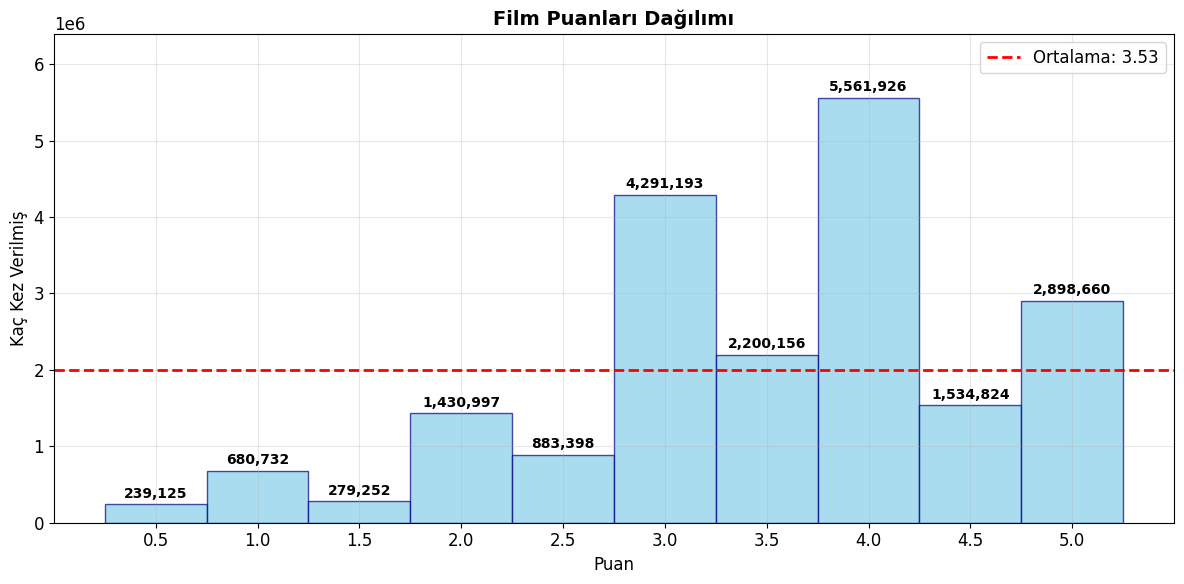


📈 BASİT İSTATİSTİKLER:
• Toplam değerlendirme: 20,000,263
• Ortalama puan: 3.53
• En popüler puan: 4.0 (5,561,926 kez)
• En az popüler puan: 0.5 (239,125 kez)


In [17]:
# %% [markdown]
# # 📊 FİLM PUANLARI DAĞILIMI - BASİT GRAFİK


print("🎯 BASİT SÜTUN GRAFİĞİ HAZIRLANIYOR...")

# Rating dağılımını hesapla
rating_counts = ratings['rating'].value_counts().sort_index()

# Basit sütun grafiği
plt.figure(figsize=(12, 6))

bars = plt.bar(rating_counts.index, rating_counts.values, 
               color='skyblue', edgecolor='navy', alpha=0.7,
               width=0.5)

# Değerleri üstte göster
for bar, count in zip(bars, rating_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50000,
             f'{count:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Film Puanları Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Puan', fontsize=12)
plt.ylabel('Kaç Kez Verilmiş', fontsize=12)
plt.xticks(rating_counts.index)
plt.grid(True, alpha=0.3)
plt.ylim(0, rating_counts.max() * 1.15)

# Ortalama çizgisi
ortalama = ratings['rating'].mean()
plt.axhline(y=rating_counts.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Ortalama: {ortalama:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Basit istatistikler
print(f"\n📈 BASİT İSTATİSTİKLER:")
print(f"• Toplam değerlendirme: {len(ratings):,}")
print(f"• Ortalama puan: {ortalama:.2f}")
print(f"• En popüler puan: {rating_counts.idxmax()} ({rating_counts.max():,} kez)")
print(f"• En az popüler puan: {rating_counts.idxmin()} ({rating_counts.min():,} kez)")

In [18]:
# %% [markdown]
# # 🎬 EN ÇOK ve EN AZ RATING ALAN FİLMLER


print("📊 FİLM RATING İSTATİSTİKLERİ HESAPLANIYOR...")

# Filmlerin rating istatistiklerini hesapla
film_istatistikleri = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean', 'std']
}).round(2)

# Sütun isimlerini düzenle
film_istatistikleri.columns = ['rating_sayisi', 'ortalama_puan', 'standart_sapma']
film_istatistikleri = film_istatistikleri.reset_index()

# Film isimleriyle birleştir
movies = pd.read_csv('data/movie.csv')
film_istatistikleri = film_istatistikleri.merge(movies, on='movieId')

print(f"✅ {len(film_istatistikleri)} filmin istatistikleri hesaplandı")

📊 FİLM RATING İSTATİSTİKLERİ HESAPLANIYOR...
✅ 26744 filmin istatistikleri hesaplandı


🎯 EN ÇOK RATING ALAN 10 FİLM

📈 TOP 10 - EN POPÜLER FİLMLER:
 1. Pulp Fiction (1994)                                | 👥 67,310 | ⭐ 4.17
 2. Forrest Gump (1994)                                | 👥 66,172 | ⭐ 4.03
 3. Shawshank Redemption, The (1994)                   | 👥 63,366 | ⭐ 4.45
 4. Silence of the Lambs, The (1991)                   | 👥 63,299 | ⭐ 4.18
 5. Jurassic Park (1993)                               | 👥 59,715 | ⭐ 3.66
 6. Star Wars: Episode IV - A New Hope (1977)          | 👥 54,502 | ⭐ 4.19
 7. Braveheart (1995)                                  | 👥 53,769 | ⭐ 4.04
 8. Terminator 2: Judgment Day (1991)                  | 👥 52,244 | ⭐ 3.93
 9. Matrix, The (1999)                                 | 👥 51,334 | ⭐ 4.19
10. Schindler's List (1993)                            | 👥 50,054 | ⭐ 4.31


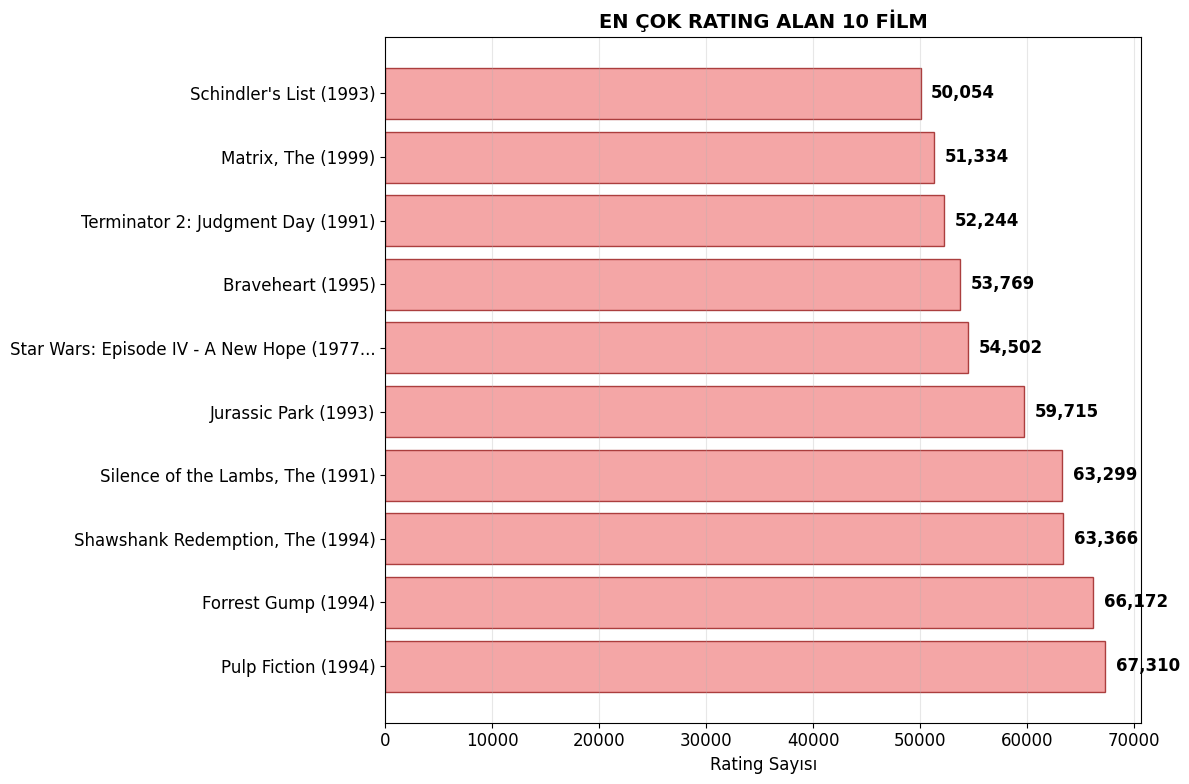

In [19]:
# %% [markdown]
# ## 🏆 EN ÇOK RATING ALAN 10 FİLM

# %%
print("🎯 EN ÇOK RATING ALAN 10 FİLM")

# En çok rating alan filmler
en_cok_rating = film_istatistikleri.nlargest(10, 'rating_sayisi')[['title', 'rating_sayisi', 'ortalama_puan']]

print(f"\n📈 TOP 10 - EN POPÜLER FİLMLER:")
print("=" * 80)
for i, (idx, film) in enumerate(en_cok_rating.iterrows(), 1):
    print(f"{i:2d}. {film['title']:50} | 👥 {film['rating_sayisi']:>6,} | ⭐ {film['ortalama_puan']:>4.2f}")

# Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(en_cok_rating)), en_cok_rating['rating_sayisi'], 
                color='lightcoral', alpha=0.7, edgecolor='darkred')

plt.title('EN ÇOK RATING ALAN 10 FİLM', fontsize=14, fontweight='bold')
plt.xlabel('Rating Sayısı')
plt.ylabel('')

# Film isimlerini yaz
film_isimleri_kisa = [isim[:40] + '...' if len(isim) > 40 else isim for isim in en_cok_rating['title']]
plt.yticks(range(len(en_cok_rating)), film_isimleri_kisa)

# Değerleri çubukların üzerinde göster
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2, 
             f'{width:,}', ha='left', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

🎯 EN AZ RATING ALAN 10 FİLM - DÜZELTİLMİŞ
🔍 KONTROL: En düşük rating sayıları:
rating_sayisi
1    10
Name: count, dtype: int64

📉 EN AZ RATING ALAN 10 FİLM (DETAYLI):
 1. Condo Painting (2000)                                        | 👥    1 kişi | ⭐ 3.00 puan
 2. Stacy's Knights (1982)                                       | 👥    1 kişi | ⭐ 1.00 puan
 3. Soap Girl (2002)                                             | 👥    1 kişi | ⭐ 3.50 puan
 4. Old San Francisco (1927)                                     | 👥    1 kişi | ⭐ 3.50 puan
 5. Bonnie Scotland (Heroes of the Regiment) (1935)              | 👥    1 kişi | ⭐ 3.00 puan
 6. Heavenly Body, The (1944)                                    | 👥    1 kişi | ⭐ 3.00 puan
 7. B.F.'s Daughter (1948)                                       | 👥    1 kişi | ⭐ 4.00 puan
 8. Story of Seabiscuit, The (1949)                              | 👥    1 kişi | ⭐ 2.50 puan
 9. Undead, The (1957)                                           | 👥    1 kişi | ⭐ 1.50 p

C:\Users\kinac\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


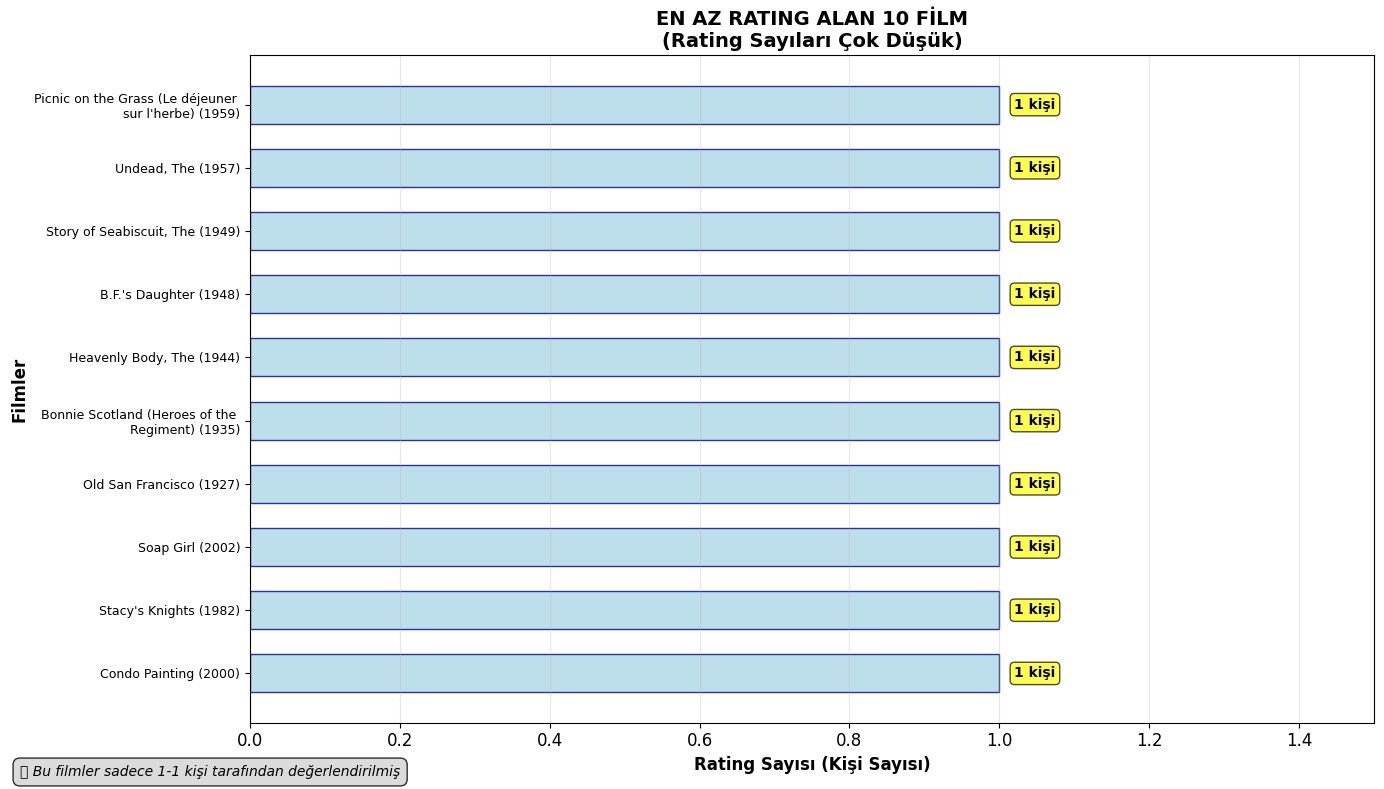


📊 EK BİLGİLER:
• En düşük rating sayısı: 1 kişi
• En yüksek rating sayısı (bu listede): 1 kişi
• Ortalama rating sayısı: 1.0 kişi
• En popüler film, en az popülerden 67,310 kat daha fazla rating almış!


In [26]:
# %% [markdown]
# ## 📉 EN AZ RATING ALAN 10 FİLM (TAM DÜZELTİLMİŞ)

# %%
print("🎯 EN AZ RATING ALAN 10 FİLM - DÜZELTİLMİŞ")

# En az rating alan filmleri al
en_az_rating = film_istatistikleri.nsmallest(10, 'rating_sayisi')[['title', 'rating_sayisi', 'ortalama_puan']]

# Kontrol: Gerçekten en az rating alan filmleri alıyor muyuz?
print("🔍 KONTROL: En düşük rating sayıları:")
print(en_az_rating['rating_sayisi'].value_counts().sort_index())

print(f"\n📉 EN AZ RATING ALAN 10 FİLM (DETAYLI):")
print("=" * 100)
for i, (idx, film) in enumerate(en_az_rating.iterrows(), 1):
    # Film adını kısalt
    film_adi = film['title'][:55] + '...' if len(film['title']) > 55 else film['title']
    print(f"{i:2d}. {film_adi:60} | 👥 {film['rating_sayisi']:>4} kişi | ⭐ {film['ortalama_puan']:>4.2f} puan")

# Görselleştirme - ÖLÇEK SORUNU ÇÖZÜLDÜ
plt.figure(figsize=(14, 8))

# Çubuk grafiği
bars = plt.barh(range(len(en_az_rating)), en_az_rating['rating_sayisi'], 
                color='lightblue', alpha=0.8, edgecolor='darkblue', height=0.6)

plt.title('EN AZ RATING ALAN 10 FİLM\n(Rating Sayıları Çok Düşük)', fontsize=14, fontweight='bold')
plt.xlabel('Rating Sayısı (Kişi Sayısı)', fontweight='bold')
plt.ylabel('Filmler', fontweight='bold')

# Film isimlerini yaz - daha okunaklı
film_isimleri = []
for isim in en_az_rating['title']:
    if len(isim) > 40:
        # Uzun isimleri iki satıra bölelim
        parts = isim.split(' ')
        short_name = ''
        current_line = ''
        for part in parts:
            if len(current_line + part) < 35:
                current_line += part + ' '
            else:
                short_name += current_line + '\n'
                current_line = part + ' '
        short_name += current_line
        film_isimleri.append(short_name.strip())
    else:
        film_isimleri.append(isim)

plt.yticks(range(len(en_az_rating)), film_isimleri, fontsize=9)

# DEĞERLERİ GÖSTER - BU SEFER KESİNLİKLE GÖSTERECEK
max_rating_value = max(en_az_rating['rating_sayisi'].max(), 1)  # En az 1 olsun
for i, bar in enumerate(bars):
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    
    # Değeri çubuğun SAĞINDA göster
    plt.text(width + max_rating_value * 0.02, y_pos, 
             f'{width} kişi', 
             ha='left', va='center', 
             fontweight='bold', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# X eksenini ayarla - KÜÇÜK SAYILAR İÇİN UYGUN
x_max = max_rating_value * 1.5
plt.xlim(0, x_max)

# Grid
plt.grid(True, alpha=0.3, axis='x')

# Ek bilgi kutusu
plt.figtext(0.02, 0.02, 
           f"💡 Bu filmler sadece {en_az_rating['rating_sayisi'].min()}-{en_az_rating['rating_sayisi'].max()} kişi tarafından değerlendirilmiş",
           fontsize=10, style='italic',
           bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# EK ANALİZ
print(f"\n📊 EK BİLGİLER:")
print(f"• En düşük rating sayısı: {en_az_rating['rating_sayisi'].min()} kişi")
print(f"• En yüksek rating sayısı (bu listede): {en_az_rating['rating_sayisi'].max()} kişi")
print(f"• Ortalama rating sayısı: {en_az_rating['rating_sayisi'].mean():.1f} kişi")

# En çok rating alan filmle karşılaştırma
en_cok_rating_max = film_istatistikleri['rating_sayisi'].max()
en_az_rating_min = en_az_rating['rating_sayisi'].min()

if en_az_rating_min > 0:
    fark = en_cok_rating_max / en_az_rating_min
    print(f"• En popüler film, en az popülerden {fark:,.0f} kat daha fazla rating almış!")

In [2]:
# %% [markdown]
# ## 📥 ÖNCE VERİLERİ YÜKLEYELİM

# %%
import pandas as pd

print("📊 VERİLER YÜKLENİYOR...")

# Ratings verisini yükle
ratings = pd.read_csv('data/rating.csv')  # rating.csv (tekil)
print(f"✅ ratings yüklendi: {len(ratings):,} satır")

# Movies verisini yükle  
movies = pd.read_csv('data/movie.csv')    # movie.csv (tekil)
print(f"✅ movies yüklendi: {len(movies):,} satır")

# İlk kontroller
print(f"\n🎯 İLK BAKIŞ:")
print(f"• Ratings sütunları: {list(ratings.columns)}")
print(f"• Movies sütunları: {list(movies.columns)}")
print(f"• Örnek film: {movies['title'].iloc[0] if len(movies) > 0 else 'Yok'}")

📊 VERİLER YÜKLENİYOR...
✅ ratings yüklendi: 20,000,263 satır
✅ movies yüklendi: 27,278 satır

🎯 İLK BAKIŞ:
• Ratings sütunları: ['userId', 'movieId', 'rating', 'timestamp']
• Movies sütunları: ['movieId', 'title', 'genres']
• Örnek film: Toy Story (1995)


In [3]:
# %% [markdown]
# ## 🔄 FİLM ve RATING VERİLERİNİ BİRLEŞTİRME

# %%
print("🔄 FİLM ve RATING VERİLERİ BİRLEŞTİRİLİYOR...")

# Birleştirme işlemi
film_rating_birlestirilmis = ratings.merge(movies, on='movieId', how='left')

print(f"✅ Birleştirme tamamlandı!")
print(f"• Ratings boyutu: {ratings.shape}")
print(f"• Movies boyutu: {movies.shape}")  
print(f"• Birleşik veri boyutu: {film_rating_birlestirilmis.shape}")
print(f"• Eklenen sütunlar: {list(movies.columns[1:])}")

# Kontrol
print("\n🎯 BİRLEŞTİRME SONRASI ÖRNEK:")
display(film_rating_birlestirilmis[['userId', 'movieId', 'title', 'genres', 'rating']].head(3))

🔄 FİLM ve RATING VERİLERİ BİRLEŞTİRİLİYOR...
✅ Birleştirme tamamlandı!
• Ratings boyutu: (20000263, 4)
• Movies boyutu: (27278, 3)
• Birleşik veri boyutu: (20000263, 6)
• Eklenen sütunlar: ['title', 'genres']

🎯 BİRLEŞTİRME SONRASI ÖRNEK:


,userId,movieId,title,genres,rating
0,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.5
1,1,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,3.5
2,1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.5


In [4]:
# %% [markdown]
# ## 📈 BİRLEŞTİRME SONRASI HIZLI ANALİZ

# %%
print("🚀 BİRLEŞTİRME SONRASI İLK ANALİZLER")

# 1. En popüler filmler (artık isimleriyle!)
en_populer_filmler = film_rating_birlestirilmis.groupby('title')['rating'].count().nlargest(5)
print(f"\n🏆 EN POPÜLER 5 FİLM:")
for film, sayi in en_populer_filmler.items():
    print(f"• {film}: {sayi:,} rating")

# 2. Film başına ortalama rating
ortalama_ratingler = film_rating_birlestirilmis.groupby('title')['rating'].mean().round(2)
en_yuksek_rating = ortalama_ratingler.nlargest(3)
print(f"\n⭐ EN YÜKSEK ORTALAMA RATING:")
for film, ortalama in en_yuksek_rating.items():
    print(f"• {film}: ⭐ {ortalama}")

# 3. Basit bir sorgu
print(f"\n🔍 'Matrix' İÇEREN FİLMLER:")
matrix_filmler = film_rating_birlestirilmis[film_rating_birlestirilmis['title'].str.contains('Matrix', na=False)]
if not matrix_filmler.empty:
    matrix_ozet = matrix_filmler.groupby('title')['rating'].agg(['count', 'mean']).round(2)
    display(matrix_ozet)
else:
    print("❌ 'Matrix' içeren film bulunamadı")

🚀 BİRLEŞTİRME SONRASI İLK ANALİZLER

🏆 EN POPÜLER 5 FİLM:
• Pulp Fiction (1994): 67,310 rating
• Forrest Gump (1994): 66,172 rating
• Shawshank Redemption, The (1994): 63,366 rating
• Silence of the Lambs, The (1991): 63,299 rating
• Jurassic Park (1993): 59,715 rating

⭐ EN YÜKSEK ORTALAMA RATING:
• 1971 (2014): ⭐ 5.0
• A Blank on the Map (1971): ⭐ 5.0
• A Gun for Jennifer (1997): ⭐ 5.0

🔍 'Matrix' İÇEREN FİLMLER:


,count,mean
title,,
"Matrix Reloaded, The (2003)",17003,3.30
"Matrix Revolutions, The (2003)",12282,3.14
"Matrix, The (1999)",51334,4.19


In [6]:
# %% [markdown]
# ## 📉 EN AZ OYLANAN FİLMLER (SADECE LİSTE)

# %%
print("🎯 EN AZ OYLANAN 20 FİLM - SADECE BİLGİ AMAÇLI")

# Film istatistiklerini hesapla (birleştirilmiş veriden)
film_istatistikleri = film_rating_birlestirilmis.groupby(['movieId', 'title']).agg({
    'rating': ['count', 'mean']
}).round(2)

# Sütun isimlerini düzelt
film_istatistikleri.columns = ['rating_sayisi', 'ortalama_puan']
film_istatistikleri = film_istatistikleri.reset_index()  # ⬅️ DÜZELTİLDİ: film_atistikleri → film_istatistikleri

# En az oylanan 20 film
en_az_oylanan = film_istatistikleri.nsmallest(20, 'rating_sayisi')

print(f"📊 EN AZ OYLANAN 20 FİLM (Sadece {en_az_oylanan['rating_sayisi'].min()}-{en_az_oylanan['rating_sayisi'].max()} oy):")
print("=" * 90)
for i, (idx, film) in enumerate(en_az_oylanan.iterrows(), 1):
    film_adi = film['title'][:60] + '...' if len(film['title']) > 60 else film['title']
    print(f"{i:2d}. {film_adi:65} | 👥 {film['rating_sayisi']:>3} oy | ⭐ {film['ortalama_puan']:>4.2f}")

🎯 EN AZ OYLANAN 20 FİLM - SADECE BİLGİ AMAÇLI
📊 EN AZ OYLANAN 20 FİLM (Sadece 1-1 oy):
 1. Condo Painting (2000)                                             | 👥   1 oy | ⭐ 3.00
 2. Stacy's Knights (1982)                                            | 👥   1 oy | ⭐ 1.00
 3. Soap Girl (2002)                                                  | 👥   1 oy | ⭐ 3.50
 4. Old San Francisco (1927)                                          | 👥   1 oy | ⭐ 3.50
 5. Bonnie Scotland (Heroes of the Regiment) (1935)                   | 👥   1 oy | ⭐ 3.00
 6. Heavenly Body, The (1944)                                         | 👥   1 oy | ⭐ 3.00
 7. B.F.'s Daughter (1948)                                            | 👥   1 oy | ⭐ 4.00
 8. Story of Seabiscuit, The (1949)                                   | 👥   1 oy | ⭐ 2.50
 9. Undead, The (1957)                                                | 👥   1 oy | ⭐ 1.50
10. Picnic on the Grass (Le déjeuner sur l'herbe) (1959)              | 👥   1 oy | ⭐ 1.00
11. North Wes

In [7]:
# %% [markdown]
# ## 🎯 ANALİZLER İÇİN MİNİMUM OY SINIRI

# %%
print("🔧 ANALİZLER İÇİN FİLTRELEME AYARI")

# Minimum oy sayısı belirle
min_oy_sayisi = 100

# Filtrelenmiş veri (düşük oylu filmler hariç)
kaliteli_filmler = film_istatistikleri[film_istatistikleri['rating_sayisi'] >= min_oy_sayisi]

print(f"📈 FİLTRELEME SONUÇLARI:")
print(f"• Tüm film sayısı: {len(film_istatistikleri):,}")
print(f"• Filtrelenmiş film sayısı (min {min_oy_sayisi} oy): {len(kaliteli_filmler):,}")
print(f"• Elenen film sayısı: {len(film_istatistikleri) - len(kaliteli_filmler):,}")
print(f"• Kapsama oranı: {(len(kaliteli_filmler) / len(film_istatistikleri) * 100):.1f}%")

# Elenen filmler hakkında bilgi
elenen_filmler = film_istatistikleri[film_istatistikleri['rating_sayisi'] < min_oy_sayisi]
print(f"• Elenen filmlerin ortalama oy sayısı: {elenen_filmler['rating_sayisi'].mean():.1f}")

🔧 ANALİZLER İÇİN FİLTRELEME AYARI
📈 FİLTRELEME SONUÇLARI:
• Tüm film sayısı: 26,744
• Filtrelenmiş film sayısı (min 100 oy): 8,546
• Elenen film sayısı: 18,198
• Kapsama oranı: 32.0%
• Elenen filmlerin ortalama oy sayısı: 16.2


In [9]:
# %% [markdown]
# ## 🎭 FİLM İSTATİSTİKLERİNE TÜR BİLGİSİ EKLEME

# %%
print("🔄 FİLM İSTATİSTİKLERİNE TÜR BİLGİSİ EKLENİYOR...")

# Film istatistiklerini genres ile birleştir
film_istatistikleri_with_genres = film_istatistikleri.merge(
    movies[['movieId', 'genres']], 
    on='movieId', 
    how='left'
)

print(f"✅ Tür bilgisi eklendi!")
print(f"• Önceki sütunlar: {list(film_istatistikleri.columns)}")
print(f"• Sonraki sütunlar: {list(film_istatistikleri_with_genres.columns)}")

# Kontrol
print(f"\n🎯 TÜR BİLGİSİ EKLENDİKTEN SONRA ÖRNEK:")
display(film_istatistikleri_with_genres[['title', 'genres', 'rating_sayisi', 'ortalama_puan']].head(3))

🔄 FİLM İSTATİSTİKLERİNE TÜR BİLGİSİ EKLENİYOR...
✅ Tür bilgisi eklendi!
• Önceki sütunlar: ['movieId', 'title', 'rating_sayisi', 'ortalama_puan']
• Sonraki sütunlar: ['movieId', 'title', 'rating_sayisi', 'ortalama_puan', 'genres']

🎯 TÜR BİLGİSİ EKLENDİKTEN SONRA ÖRNEK:


,title,genres,rating_sayisi,ortalama_puan
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,49695,3.92
1,Jumanji (1995),Adventure|Children|Fantasy,22243,3.21
2,Grumpier Old Men (1995),Comedy|Romance,12735,3.15


In [10]:
# %% [markdown]
# ## 🤖 DÜZELTİLMİŞ TÜR TABANLI ÖNERİ SİSTEMİ

# %%
def tur_based_recommendation(film_adi_arama, film_verisi=film_rating_birlestirilmis, n=10):
    """Film türüne göre benzer filmler öner"""
    
    # Film ara
    bulunan_filmler = film_verisi[
        film_verisi['title'].str.contains(film_adi_arama, case=False, na=False)
    ]
    
    if bulunan_filmler.empty:
        print(f"❌ '{film_adi_arama}' ile eşleşen film bulunamadı")
        return None
    
    # Hedef filmi seç (en popüler olanı)
    hedef_film = bulunan_filmler.iloc[0]
    print(f"🎯 HEDEF FİLM: {hedef_film['title']}")
    print(f"   🎭 Türler: {hedef_film['genres']}")
    
    # Hedef filmin türlerini al
    hedef_turler = set(str(hedef_film['genres']).split('|'))
    
    # Tüm filmlerde tür benzerliği hesapla
    def tur_benzerlik_skoru(diger_film_turler):
        if pd.isna(diger_film_turler):
            return 0
        diger_turler = set(str(diger_film_turler).split('|'))
        ortak_turler = hedef_turler.intersection(diger_turler)
        return len(ortak_turler)
    
    # Film istatistiklerine benzerlik skoru ekle
    film_istatistikleri_with_genres['benzerlik'] = film_istatistikleri_with_genres['genres'].apply(tur_benzerlik_skoru)
    
    # Benzer filmleri öner (hedef film hariç)
    benzer_filmler = film_istatistikleri_with_genres[
        (film_istatistikleri_with_genres['movieId'] != hedef_film['movieId']) &
        (film_istatistikleri_with_genres['benzerlik'] > 0) &
        (film_istatistikleri_with_genres['rating_sayisi'] >= 100)  # Güvenilir filmler
    ].nlargest(n, ['benzerlik', 'ortalama_puan'])
    
    if benzer_filmler.empty:
        print("❌ Benzer türde film bulunamadı")
        return None
    
    print(f"\n🎬 ÖNERİLEN {len(benzer_filmler)} FİLM (Aynı Tür):")
    print("=" * 80)
    for i, (_, film) in enumerate(benzer_filmler.iterrows(), 1):
        ortak_turler = hedef_turler.intersection(set(str(film['genres']).split('|')))
        film_adi = film['title'][:45] + '...' if len(film['title']) > 45 else film['title']
        print(f"{i:2d}. {film_adi:48} | ⭐ {film['ortalama_puan']:>4.2f} | 👥 {film['rating_sayisi']:>5,}")
        print(f"    🎭 Ortak türler: {', '.join(ortak_turler)}")
    
    return benzer_filmler

# Test et
print("🧪 DÜZELTİLMİŞ TÜR TABANLI ÖNERİ SİSTEMİ TESTİ:")
onerilen_filmler = tur_based_recommendation("Matrix", film_rating_birlestirilmis, 5)

🧪 DÜZELTİLMİŞ TÜR TABANLI ÖNERİ SİSTEMİ TESTİ:
🎯 HEDEF FİLM: Matrix, The (1999)
   🎭 Türler: Action|Sci-Fi|Thriller

🎬 ÖNERİLEN 5 FİLM (Aynı Tür):
 1. Inception (2010)                                 | ⭐ 4.16 | 👥 14,023
    🎭 Ortak türler: Action, Thriller, Sci-Fi
 2. Blade Runner (1982)                              | ⭐ 4.13 | 👥 30,526
    🎭 Ortak türler: Action, Thriller, Sci-Fi
 3. V for Vendetta (2006)                            | ⭐ 3.93 | 👥 14,356
    🎭 Ortak türler: Action, Thriller, Sci-Fi
 4. Terminator, The (1984)                           | ⭐ 3.90 | 👥 33,429
    🎭 Ortak türler: Action, Thriller, Sci-Fi
 5. Children of Men (2006)                           | ⭐ 3.89 | 👥 8,969
    🎭 Ortak türler: Action, Thriller, Sci-Fi


In [11]:
# %% [markdown]
# ## 🚀 ÖNERİ SİSTEMİNİ GELİŞTİRME

# %%
def gelismis_oneri_sistemi(film_adi_arama, min_oy=100, n=8, benzerlik_agirlik=0.7):
    """Gelişmiş öneri sistemi - Benzerlik ve popülerlik dengesi"""
    
    bulunan_filmler = film_rating_birlestirilmis[
        film_rating_birlestirilmis['title'].str.contains(film_adi_arama, case=False, na=False)
    ]
    
    if bulunan_filmler.empty:
        print(f"❌ '{film_adi_arama}' bulunamadı")
        return None
    
    hedef_film = bulunan_filmler.iloc[0]
    hedef_turler = set(str(hedef_film['genres']).split('|'))
    
    print(f"🎯 HEDEF FİLM: {hedef_film['title']}")
    print(f"   🎭 Türler: {', '.join(hedef_turler)}")
    
    # Benzerlik skoru hesapla
    def kapsamli_benzerlik_skoru(film):
        if pd.isna(film['genres']):
            return 0
        
        diger_turler = set(str(film['genres']).split('|'))
        ortak_turler = hedef_turler.intersection(diger_turler)
        benzerlik = len(ortak_turler)
        
        # Popülerlik bonusu (normalize edilmiş)
        populerlik_bonus = min(film['rating_sayisi'] / 50000, 1.0)  # Max 50K oy
        
        # Kombine skor
        return benzerlik * benzerlik_agirlik + populerlik_bonus * (1 - benzerlik_agirlik)
    
    # Skorları hesapla
    film_istatistikleri_with_genres['oneri_skoru'] = film_istatistikleri_with_genres.apply(
        kapsamli_benzerlik_skoru, axis=1
    )
    
    # Öner
    onerilen_filmler = film_istatistikleri_with_genres[
        (film_istatistikleri_with_genres['movieId'] != hedef_film['movieId']) &
        (film_istatistikleri_with_genres['rating_sayisi'] >= min_oy) &
        (film_istatistikleri_with_genres['oneri_skoru'] > 0)
    ].nlargest(n, ['oneri_skoru', 'ortalama_puan'])
    
    if onerilen_filmler.empty:
        print("❌ Önerilecek film bulunamadı")
        return None
    
    print(f"\n🎬 GELİŞMİŞ ÖNERİLER ({len(onerilen_filmler)} film):")
    print("=" * 90)
    for i, (_, film) in enumerate(onerilen_filmler.iterrows(), 1):
        ortak_turler = hedef_turler.intersection(set(str(film['genres']).split('|')))
        film_adi = film['title'][:40] + '...' if len(film['title']) > 40 else film['title']
        print(f"{i:2d}. {film_adi:43} | ⭐ {film['ortalama_puan']:>4.2f} | 👥 {film['rating_sayisi']:>6,} | 🎯 Skor: {film['oneri_skoru']:.2f}")
        print(f"     🎭 {', '.join(ortak_turler)}")
    
    return onerilen_filmler

# Test et
print("🚀 GELİŞMİŞ ÖNERİ SİSTEMİ TESTİ:")
gelismis_oneri = gelismis_oneri_sistemi("Star Wars", min_oy=100, n=6)

🚀 GELİŞMİŞ ÖNERİ SİSTEMİ TESTİ:
🎯 HEDEF FİLM: Star Wars: Episode IV - A New Hope (1977)
   🎭 Türler: Action, Adventure, Sci-Fi

🎬 GELİŞMİŞ ÖNERİLER (6 film):
 1. Jurassic Park (1993)                        | ⭐ 3.66 | 👥 59,715 | 🎯 Skor: 2.40
     🎭 Action, Adventure, Sci-Fi
 2. Independence Day (a.k.a. ID4) (1996)        | ⭐ 3.37 | 👥 47,048 | 🎯 Skor: 2.38
     🎭 Action, Adventure, Sci-Fi
 3. Star Wars: Episode VI - Return of the Je... | ⭐ 4.00 | 👥 46,839 | 🎯 Skor: 2.38
     🎭 Action, Adventure, Sci-Fi
 4. Star Wars: Episode V - The Empire Strike... | ⭐ 4.19 | 👥 45,313 | 🎯 Skor: 2.37
     🎭 Action, Adventure, Sci-Fi
 5. Stargate (1994)                             | ⭐ 3.35 | 👥 31,799 | 🎯 Skor: 2.29
     🎭 Action, Adventure, Sci-Fi
 6. Star Wars: Episode I - The Phantom Menac... | ⭐ 3.08 | 👥 29,574 | 🎯 Skor: 2.28
     🎭 Action, Adventure, Sci-Fi


In [12]:
# %% [markdown]
# ## 🧪 FARKLI FİLMLERLE TEST

# %%
print("🎬 FARKLI TÜRLERDE ÖNERİ TESTLERİ")

test_filmler = [
    "Titanic",           # Romance|Drama
    "Lord of the Rings", # Adventure|Fantasy  
    "Toy Story",         # Animation|Children
    "Pulp Fiction",      # Crime|Thriller
    "Forrest Gump"       # Drama|Romance
]

for test_film in test_filmler:
    print(f"\n{'='*50}")
    print(f"🎯 TEST: {test_film}")
    print(f"{'='*50}")
    try:
        gelismis_oneri_sistemi(test_film, min_oy=100, n=4)
    except Exception as e:
        print(f"❌ Hata: {e}")

🎬 FARKLI TÜRLERDE ÖNERİ TESTLERİ

🎯 TEST: Titanic
🎯 HEDEF FİLM: Titanic (1997)
   🎭 Türler: Drama, Romance

🎬 GELİŞMİŞ ÖNERİLER (4 film):
 1. Forrest Gump (1994)                         | ⭐ 4.03 | 👥 66,172 | 🎯 Skor: 1.70
     🎭 Drama, Romance
 2. Ghost (1990)                                | ⭐ 3.44 | 👥 29,488 | 🎯 Skor: 1.58
     🎭 Drama, Romance
 3. Sleepless in Seattle (1993)                 | ⭐ 3.52 | 👥 28,805 | 🎯 Skor: 1.57
     🎭 Drama, Romance
 4. Good Will Hunting (1997)                    | ⭐ 4.03 | 👥 28,324 | 🎯 Skor: 1.57
     🎭 Drama, Romance

🎯 TEST: Lord of the Rings
🎯 HEDEF FİLM: Lord of the Rings: The Fellowship of the Ring, The (2001)
   🎭 Türler: Adventure, Fantasy

🎬 GELİŞMİŞ ÖNERİLER (4 film):
 1. Toy Story (1995)                            | ⭐ 3.92 | 👥 49,695 | 🎯 Skor: 1.70
     🎭 Adventure, Fantasy
 2. Lord of the Rings: The Two Towers, The (... | ⭐ 4.11 | 👥 33,947 | 🎯 Skor: 1.60
     🎭 Adventure, Fantasy
 3. Monty Python and the Holy Grail (1975)      | ⭐ 4.17 | 👥 3

KeyboardInterrupt: 